1)Unzip the file

In [ ]:
!unzip '/content/drive/MyDrive/Foods.zip'

2)Import the ImageDataGenerator library


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

3)Configure ImageDataGenerator class

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

4)Apply ImageDataGenerator Functionality To Trainset And Testset

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/Foods/Foods/Training',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 2710 images belonging to 8 classes.


In [ ]:
xtest = test_datagen.flow_from_directory('/content/Foods/Foods/Testing',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 686 images belonging to 8 classes.


Model Building

1)Importing The Model Building Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

2)Initializing The Model

In [ ]:
model = Sequential()

3)Adding CNN Layers

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2))) 

In [ ]:
model.add(Flatten())

4)Adding Dense Layer

In [ ]:
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu')) 
model.add(Dense(8,activation='softmax')) 

5)Configure the learning Process

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6) Train the model

In [ ]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
28/28 [==============================] - 85s 3s/step - loss: 2.5344 - accuracy: 0.2125 - val_loss: 1.6672 - val_accuracy: 0.3571
Epoch 2/10
28/28 [==============================] - 82s 3s/step - loss: 1.5426 - accuracy: 0.4402 - val_loss: 1.3408 - val_accuracy: 0.5131
Epoch 3/10
28/28 [==============================] - 82s 3s/step - loss: 1.3622 - accuracy: 0.5118 - val_loss: 1.2086 - val_accuracy: 0.5700
Epoch 4/10
28/28 [==============================] - 82s 3s/step - loss: 1.2439 - accuracy: 0.5472 - val_loss: 1.0607 - val_accuracy: 0.6370
Epoch 5/10
28/28 [==============================] - 83s 3s/step - loss: 1.1218 - accuracy: 0.6100 - val_loss: 1.0381 - val_accuracy: 0.6210
Epoch 6/10
28/28 [==============================] - 81s 3s/step - loss: 1.0601 - accuracy: 0.6207 - val_loss: 1.0196 - val_accuracy: 0.6283
Epoch 7/10
28/28 [==============================] - 82s 3s/step - loss: 1.0331 - accuracy: 0.6358 - val_loss: 1.0195 - val_accuracy: 0.6414
Epoch 8/10
28/28 [==

Tuning the Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=5)

lr = ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=0.5, 
                       patience=5,
                       min_lr=0.00001)

callbacks = [early_stop,lr]
# Training model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callbacks,
                    validation_data=xtest,
                    validation_steps=len(xtest),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
28/28 [==============================] - 85s 3s/step - loss: 0.8511 - accuracy: 0.7044 - val_loss: 1.1060 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 2/100
28/28 [==============================] - 82s 3s/step - loss: 0.8052 - accuracy: 0.7137 - val_loss: 0.9207 - val_accuracy: 0.7085 - lr: 0.0010
Epoch 3/100
28/28 [==============================] - 80s 3s/step - loss: 0.7946 - accuracy: 0.7188 - val_loss: 0.7861 - val_accuracy: 0.7114 - lr: 0.0010
Epoch 4/100
28/28 [==============================] - 81s 3s/step - loss: 0.7563 - accuracy: 0.7354 - val_loss: 1.0053 - val_accuracy: 0.6676 - lr: 0.0010
Epoch 5/100
28/28 [==============================] - 90s 3s/step - loss: 0.7211 - accuracy: 0.7531 - val_loss: 0.9169 - val_accuracy: 0.7055 - lr: 0.0010
Epoch 6/100
28/28 [==============================] - 82s 3s/step - loss: 0.6483 - accuracy: 0.7768 - val_loss: 0.9852 - val_accuracy: 0.6866 - lr: 0.0010
Epoch 7/100
28/28 [==============================] - 81s 3s/step - loss: 0.6

7)Save The Model

In [ ]:
model.save('nutrition.h5')

8)Test The Model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
foods = ['Apple', 'Banana', 'Bhel puri', 'Burger', 'Egg', 'Mango', 'Onion','Pizza']

Testing 1

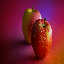

In [ ]:
img = image.load_img('/content/Foods/Foods/Testing/Apple/apple (50).jpg', target_size = (64,64))
img

In [ ]:
 
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 24ms/step
0 [[1. 0. 0. 0. 0. 0. 0. 0.]]
Apple


Testing 2

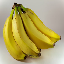

In [ ]:
img = image.load_img('/content/Foods/Foods/Testing/Banana/download (1).jpg', target_size = (64,64))
img

In [ ]:
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 24ms/step
1 [[0. 1. 0. 0. 0. 0. 0. 0.]]
Banana


Testing 3

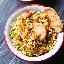

In [ ]:
img = image.load_img('/content/Foods/Foods/Testing/Bhel puri/bhel (11).jpg', target_size = (64,64))
img

In [ ]:
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 26ms/step
2 [[0. 0. 1. 0. 0. 0. 0. 0.]]
Bhel puri


Testing 4

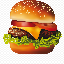

In [ ]:
img = image.load_img('/content/Foods/Foods/Testing/Burger/burger (12).png', target_size = (64,64))
img

In [ ]:
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 21ms/step
3 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.2118008e-32]]
Burger


Testing 5

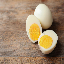

In [ ]:
img = image.load_img('/content/Foods/Foods/Testing/Egg/eggs (13).jpg', target_size = (64,64))
img

In [ ]:
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 25ms/step
4 [[0. 0. 0. 0. 1. 0. 0. 0.]]
Egg


Testing 6

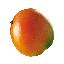

In [ ]:

img = image.load_img('/content/Foods/Foods/Testing/Mango/mango (36).jpg', target_size = (64, 64))
img

In [ ]:
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 19ms/step
5 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.1053707e-38
  1.0000000e+00 0.0000000e+00 0.0000000e+00]]
Mango


Testing 7

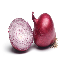

In [ ]:
img = image.load_img('/content/Foods/Foods/Testing/Onion/onion (1).jpg', target_size = (64, 64))
img

In [ ]:
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 21ms/step
6 [[0. 0. 0. 0. 0. 0. 1. 0.]]
Onion


Testing 8

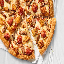

In [ ]:
img = image.load_img('/content/Foods/Foods/Testing/Pizza/pizza (31).jpg', target_size = (64, 64))
img

In [ ]:
x = image.img_to_array(img) 
x = np.expand_dims(x,axis=0) 
pred = np.argmax(model.predict(x)) 
print(pred, model.predict(x))
print(foods[pred])

1/1 [==============================] - 0s 20ms/step
7 [[0. 0. 0. 0. 0. 0. 0. 1.]]
Pizza
